In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime

import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

In [2]:
#df = pd.read_csv('chaiyo_encode_data.csv', index_col=0)
df = pd.read_csv('chaiyo_clean_60.csv', index_col=0)
df

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,199000.0,199000.00,60,F,STREET VENDOR,20000.0,PU,NISSAN,FRONTIER NAVARA,2012,AD,283500,S1,2022-11-14,S1,PL,44,11
1,60000.0,58822.04,36,M,อื่นๆ,14000.0,CAR,TOYOTA,COROLLA ALTIS,2002,AJ,111000,S1,2022-09-06,S1,PL,53,21
2,36000.0,35904.37,24,F,พนักงานบริษัท,15000.0,MC,HONDA,CLICK 150I,2019,BH,48500,S1,2022-12-30,S2,PL,32,4
3,30000.0,28813.69,24,F,เกษตรกร,35000.0,MC,HONDA,PCX 150,2020,ED,76500,S1,2022-11-12,S1,PL,37,3
5,111000.0,111000.00,60,M,เกษตรกร,12645.0,PU,TOYOTA,HILUX TIGER,2003,BE,190000,S1,2022-12-15,S1,PL,61,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,34000.0,34000.00,36,M,อื่นๆ,14000.0,MC,HONDA,DREAM 110I,2017,CO,53000,S3,2022-12-14,S2,NPL,22,6
1579,154000.0,154000.00,48,M,อื่นๆ,9500.0,PU,TOYOTA,HILUX VIGO,2005,CT,192000,S3,2022-12-27,S2,NPL,47,18
1580,14000.0,14000.00,12,F,STREET VENDOR,15000.0,MC,YAMAHA,FINO (MLEKE),2009,AH,23000,S3,2022-12-24,S2,NPL,67,14
1583,144000.0,144000.00,60,M,ข้าราชการ,36000.0,CAR,TOYOTA,VIOS,2010,DX,222000,S3,2022-12-29,S2,NPL,54,13


In [3]:
df[df['DPD']=='PL'].shape

(1165, 18)

In [4]:
df[df['DPD']=='NPL'].shape

(132, 18)

In [5]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand','Vehicle Model','System CAR Code (Daily)','Final CAR Code Previous Month']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [6]:
df.head()

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,199000.0,199000.00,60,0,0,20000.0,2,11,60,2012,AD,283500,0,2022-11-14,0,PL,44,11
1,60000.0,58822.04,36,1,6,14000.0,0,15,31,2002,AJ,111000,0,2022-09-06,0,PL,53,21
2,36000.0,35904.37,24,0,3,15000.0,1,5,25,2019,BH,48500,0,2022-12-30,1,PL,32,4
3,30000.0,28813.69,24,0,7,35000.0,1,5,95,2020,ED,76500,0,2022-11-12,0,PL,37,3
5,111000.0,111000.00,60,1,7,12645.0,2,15,65,2003,BE,190000,0,2022-12-15,0,PL,61,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1585
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Principal Approve Amount       1297 non-null   float64
 1   Principal Amount               1297 non-null   float64
 2   Repayment Tenor Month Number   1297 non-null   int64  
 3   Gender                         1297 non-null   int32  
 4   Occupation Description         1297 non-null   int32  
 5   Total Income Amount (Month)    1297 non-null   float64
 6   Collateral Type Code           1297 non-null   int32  
 7   Vehicle Brand                  1297 non-null   int32  
 8   Vehicle Model                  1297 non-null   int32  
 9   Vehicle Release Year           1297 non-null   int64  
 10  Vehicle Sub Model              1297 non-null   object 
 11  Evaluation Amount              1297 non-null   int64  
 12  System CAR Code (Daily)        1297 non-null   i

In [8]:
df.describe()

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,66282.974495,65577.762845,35.500386,0.457980,3.548959,18488.248072,1.004626,8.295297,83.983038,2012.670008,104138.936006,0.518119,0.147263,40.406322,10.329992
std,70394.654619,70346.879353,15.665786,0.498423,2.642416,6867.098508,0.607294,4.861659,41.629869,5.440671,108159.060480,0.628431,0.365225,10.305925,5.440671
min,3000.000000,2110.760000,12.000000,0.000000,0.000000,6500.000000,0.000000,0.000000,0.000000,1990.000000,10000.000000,0.000000,0.000000,21.000000,1.000000
25%,21000.000000,20160.780000,24.000000,0.000000,0.000000,13500.000000,1.000000,5.000000,42.000000,2009.000000,34900.000000,0.000000,0.000000,33.000000,6.000000
50%,30000.000000,29000.000000,36.000000,0.000000,3.000000,17000.000000,1.000000,5.000000,95.000000,2013.000000,43000.000000,0.000000,0.000000,39.000000,10.000000
75%,100000.000000,100000.000000,48.000000,1.000000,6.000000,22000.000000,1.000000,15.000000,127.000000,2017.000000,180000.000000,1.000000,0.000000,47.000000,14.000000
max,290000.000000,284719.660000,60.000000,1.000000,8.000000,39600.000000,4.000000,17.000000,138.000000,2022.000000,831000.000000,2.000000,2.000000,69.000000,33.000000


In [9]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age
count,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00
mean,66282.97,65577.76,35.50,0.46,3.55,18488.25,1.00,8.30,83.98,2012.67,104138.94,0.52,0.15,40.41,10.33
std,70394.65,70346.88,15.67,0.50,2.64,6867.10,0.61,4.86,41.63,5.44,108159.06,0.63,0.37,10.31,5.44
min,3000.00,2110.76,12.00,0.00,0.00,6500.00,0.00,0.00,0.00,1990.00,10000.00,0.00,0.00,21.00,1.00
25%,21000.00,20160.78,24.00,0.00,0.00,13500.00,1.00,5.00,42.00,2009.00,34900.00,0.00,0.00,33.00,6.00
50%,30000.00,29000.00,36.00,0.00,3.00,17000.00,1.00,5.00,95.00,2013.00,43000.00,0.00,0.00,39.00,10.00
75%,100000.00,100000.00,48.00,1.00,6.00,22000.00,1.00,15.00,127.00,2017.00,180000.00,1.00,0.00,47.00,14.00
max,290000.00,284719.66,60.00,1.00,8.00,39600.00,4.00,17.00,138.00,2022.00,831000.00,2.00,2.00,69.00,33.00


In [10]:
df.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

In [11]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age
count,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00,1297.00
mean,66282.97,65577.76,35.50,0.46,3.55,18488.25,1.00,8.30,83.98,2012.67,104138.94,0.52,0.15,40.41,10.33
std,70394.65,70346.88,15.67,0.50,2.64,6867.10,0.61,4.86,41.63,5.44,108159.06,0.63,0.37,10.31,5.44
min,3000.00,2110.76,12.00,0.00,0.00,6500.00,0.00,0.00,0.00,1990.00,10000.00,0.00,0.00,21.00,1.00
25%,21000.00,20160.78,24.00,0.00,0.00,13500.00,1.00,5.00,42.00,2009.00,34900.00,0.00,0.00,33.00,6.00
50%,30000.00,29000.00,36.00,0.00,3.00,17000.00,1.00,5.00,95.00,2013.00,43000.00,0.00,0.00,39.00,10.00
75%,100000.00,100000.00,48.00,1.00,6.00,22000.00,1.00,15.00,127.00,2017.00,180000.00,1.00,0.00,47.00,14.00
max,290000.00,284719.66,60.00,1.00,8.00,39600.00,4.00,17.00,138.00,2022.00,831000.00,2.00,2.00,69.00,33.00


In [12]:
#sns.pairplot(df, hue="DPD")

<Figure size 1080x720 with 0 Axes>

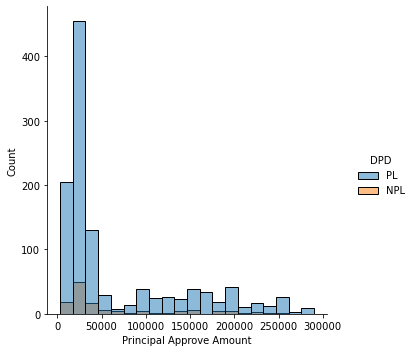

In [13]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="Principal Approve Amount", hue="DPD")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal Approve Amount', ylabel='Density'>

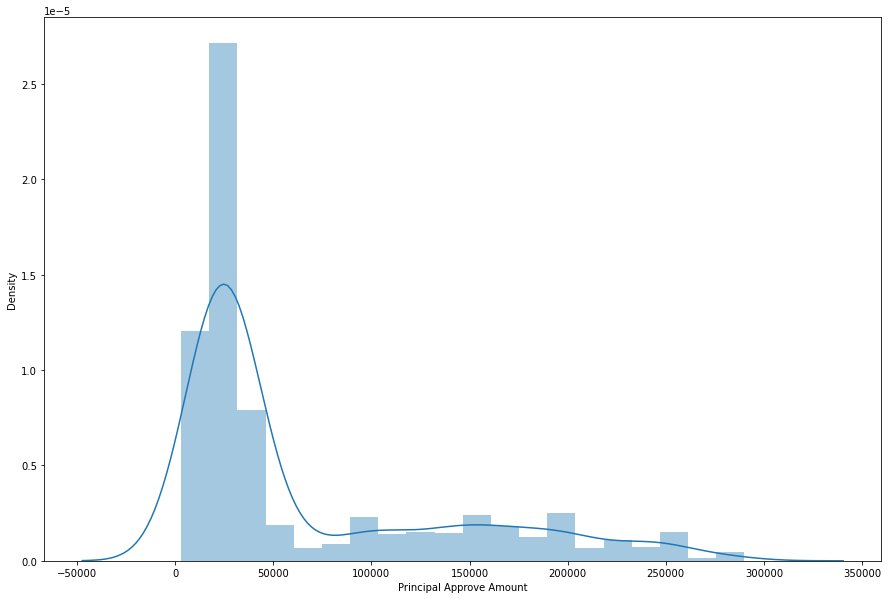

In [14]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal Approve Amount'])

In [15]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True, cmap="BuPu")

In [16]:
df.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

In [17]:
cols = df[['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age']]

In [18]:


X = cols
       # test approve กับ ที่ปล่อย
X2 = df[['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [21]:
X_train.shape

(907, 12)

In [22]:
X_test.shape

(390, 12)

In [23]:
y_train.shape

(907,)

In [24]:
y_test.shape

(390,)

In [25]:
df[df['DPD']=='PL'].shape

(1165, 18)

In [26]:
df[df['DPD']=='NPL'].shape

(132, 18)

In [27]:
y_train.value_counts()

PL     815
NPL     92
Name: DPD, dtype: int64

In [28]:
y_test.value_counts()

PL     350
NPL     40
Name: DPD, dtype: int64

In [29]:
df.shape

(1297, 18)

# Imbalance Oversampling and Undersampling SMOTE

In [30]:
#pip install imblearn
#pip install Counter

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [32]:
#Fitting SMOTE to the train set
smote = SMOTE(random_state=101)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

In [33]:
print('Before sampling class distribution : ', Counter(y_train))
print('After sampling class distribution : ', Counter(smote_y_train))

Before sampling class distribution :  Counter({'PL': 815, 'NPL': 92})
After sampling class distribution :  Counter({'NPL': 815, 'PL': 815})


In [34]:
smote_X_train.shape

(1630, 12)

In [35]:
smote_y_train.shape

(1630,)

In [36]:
smote_y_train.value_counts()

PL     815
NPL    815
Name: DPD, dtype: int64

In [37]:
y_test.value_counts()

PL     350
NPL     40
Name: DPD, dtype: int64

## Feature Importance Decisiontree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy')

model.fit(smote_X_train, smote_y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
X = cols
       # test approve กับ ที่ปล่อย
y = df['DPD']

In [40]:
model.feature_importances_

array([0.1382841 , 0.05348509, 0.01534061, 0.12375264, 0.07524214,
       0.03132607, 0.08440369, 0.14223317, 0.03206714, 0.16264019,
       0.10522558, 0.03599958])

In [41]:
fs = pd.Series(model.feature_importances_, index=smote_X_train.columns).sort_values(
    ascending=False
)
fs

Evaluation Amount               0.162640
Vehicle Model                   0.142233
Principal Approve Amount        0.138284
Occupation Description          0.123753
age                             0.105226
Vehicle Brand                   0.084404
Total Income Amount (Month)     0.075242
Repayment Tenor Month Number    0.053485
Vehicle Age                     0.036000
Vehicle Release Year            0.032067
Collateral Type Code            0.031326
Gender                          0.015341
dtype: float64

In [42]:
fs.sum()

1.0

<AxesSubplot:>

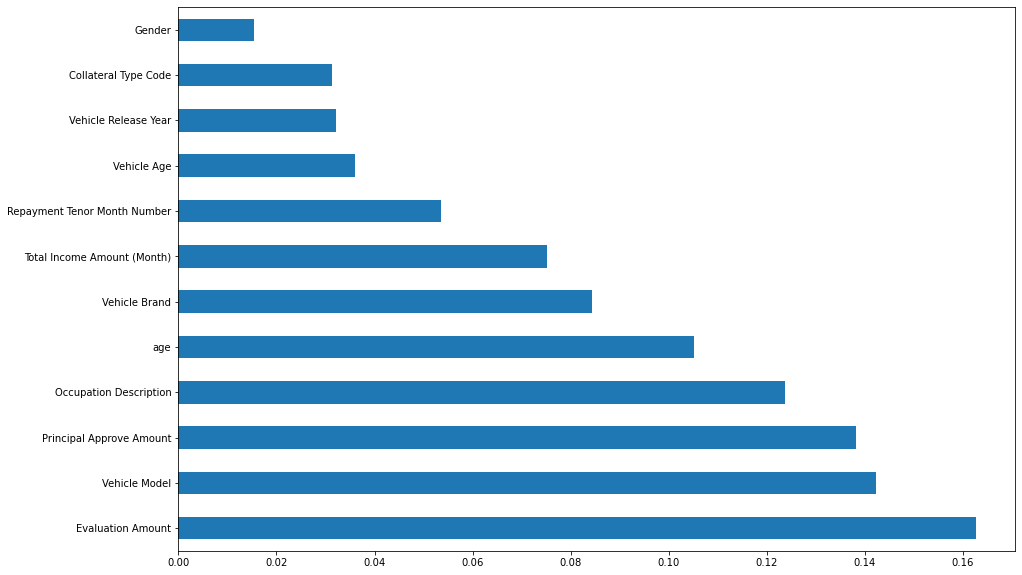

In [43]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

# Cross Validation

In [44]:
# from sklearn.model_selection import cross_val_score
# def classify(model, x,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#     model.fit(X_train, y_train)
#     print("Accuracy is : ", model.score(X_test, y_test)*100)
#     #Cross Calidation
#     #eg: cv-5, train-4, test-1
#     score = cross_val_score(model, X, y, cv=10)
#     print(score)
#     print("Cross Validation is ", np.mean(score)*100)

In [45]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    smote_X_train, X_test, smote_y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    model.fit(smote_X_train, smote_y_train)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation is ", np.mean(score)*100)
    print("Cross Validation is ", np.std(score)*100)
    return model

In [46]:
# from sklearn.model_selection import cross_val_score,KFold
# from sklearn.linear_model import LogisticRegression

# logreg=LogisticRegression()
# kf=KFold(n_splits=5)
# score=cross_val_score(logreg,X,y,cv=kf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Validation score :{}".format(score.mean()*100))

In [47]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression

# # # Example data:
# # data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# # target = np.array([0, 0, 0, 1, 1, 1])

# # Define the KFold object
# kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Store the results of cross-validation
# results = []
# for train_index, test_index in kfold.split(X):
# X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]

# model.fit(X_train.reshape(-1, 1), y_train)
# score = model.score(X_test.reshape(-1, 1), y_test)
# results.append(score)

# # Average performance across all folds
# avg_result = np.mean(results)
# print("Average accuracy: {:.2f}".format(avg_result))

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
cv_lr = classify(model,X,y)

Accuracy is :  90.76923076923077
[0.9        0.9        0.9        0.9        0.9        0.89230769
 0.89230769 0.89922481 0.89922481 0.89922481]
Cross Validation is  89.82289803220036
Cross Validation is  0.2979611795909501


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
cv_dt = classify(model,X,y)

Accuracy is :  80.76923076923077
[0.75384615 0.79230769 0.83846154 0.86153846 0.83076923 0.86153846
 0.83076923 0.80620155 0.71317829 0.7751938 ]
Cross Validation is  80.63804412641623
Cross Validation is  4.573927170715705


In [50]:
# sum(cv_dt.predict(X) == y)

In [51]:
# pd.crosstab(y, cv_dt.predict(X))

In [52]:
# 424/(424+54)

In [53]:
# 424/(424+68)

In [54]:
# len(y)

## DecisionTree

In [55]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(smote_X_train,smote_y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [56]:
#prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy Score: 78.97435897435898
[0.74615385 0.76923077 0.8        0.86923077 0.83846154 0.85384615
 0.84615385 0.82170543 0.73643411 0.78294574]
Cross Validation is  80.64162194394753
Cross Validation is  4.420276719048765


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  5  35]
 [ 47 303]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.10      0.12      0.11        40
          PL       0.90      0.87      0.88       350

    accuracy                           0.79       390
   macro avg       0.50      0.50      0.49       390
weighted avg       0.81      0.79      0.80       390



In [58]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [59]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

### Prunning

In [68]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(smote_X_train, smote_y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy: 63.84615384615384
[0.73846154 0.79230769 0.80769231 0.87692308 0.83076923 0.85384615
 0.83846154 0.81395349 0.7751938  0.81395349]
Cross Validation is  81.41562313655338
Cross Validation is  3.7614741046824123


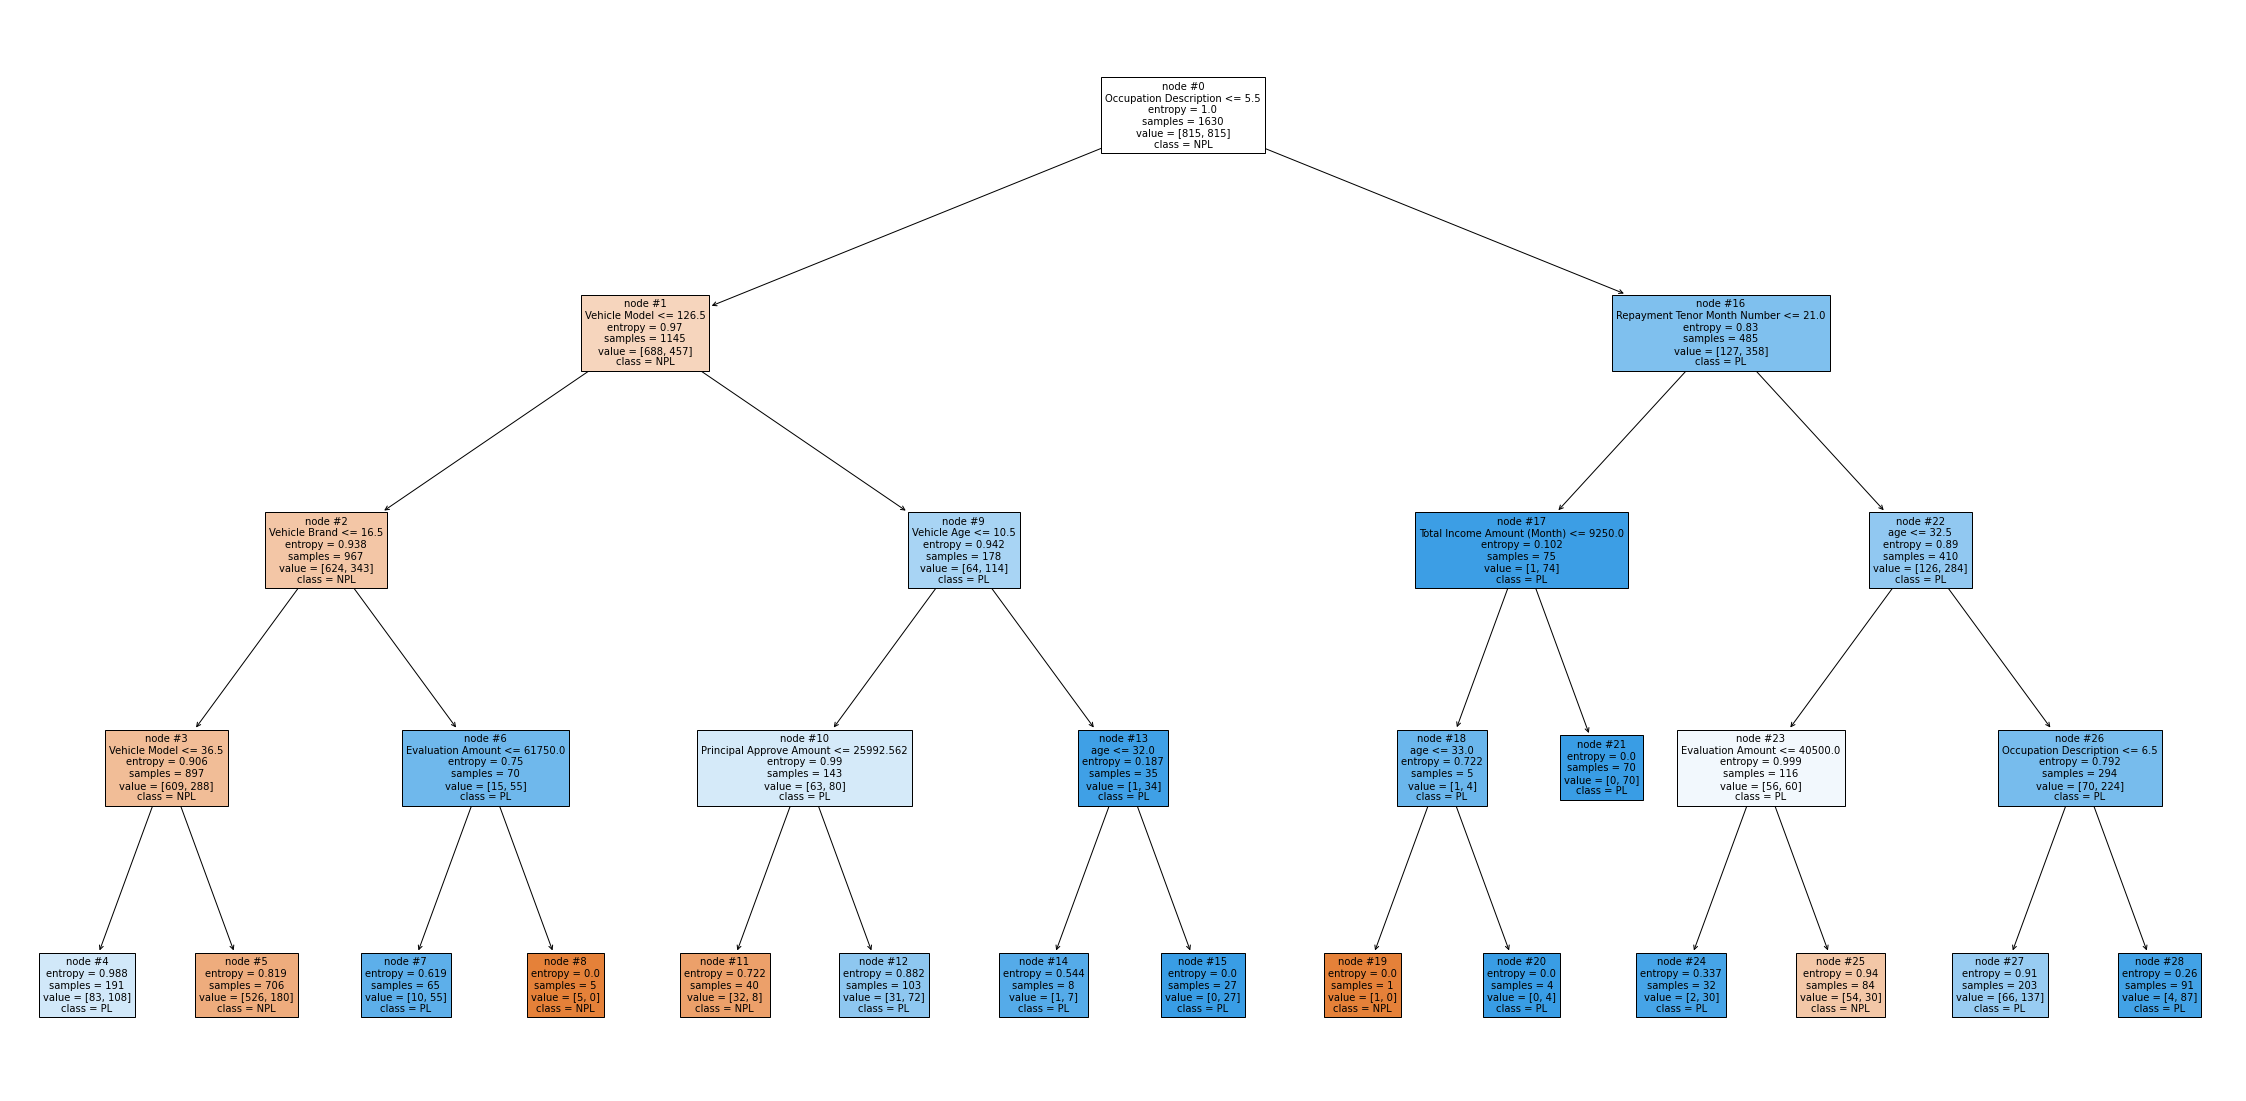

In [69]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [70]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [71]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

NameError: name 'graphviz' is not defined

### Confusion Metric and Classification report

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 10  30]
 [111 239]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.08      0.25      0.12        40
          PL       0.89      0.68      0.77       350

    accuracy                           0.64       390
   macro avg       0.49      0.47      0.45       390
weighted avg       0.81      0.64      0.71       390



In [73]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [74]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=101)

In [76]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy Score: 86.15384615384616
[0.9        0.90769231 0.9        0.91538462 0.90769231 0.89230769
 0.88461538 0.89147287 0.89147287 0.89147287]
Cross Validation is  89.82110912343471
Cross Validation is  0.9148888225229147


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 80  74]
 [ 66 170]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.55      0.52      0.53       154
          PL       0.70      0.72      0.71       236

    accuracy                           0.64       390
   macro avg       0.62      0.62      0.62       390
weighted avg       0.64      0.64      0.64       390



In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

## ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = ExtraTreesClassifier()
classifier = model.fit(smote_X_train,smote_y_train)
classifier

ExtraTreesClassifier()

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy Score: 63.589743589743584
[0.60769231 0.50769231 0.60769231 0.60769231 0.60769231 0.6
 0.7        0.64341085 0.5503876  0.63565891]
Cross Validation is  60.67918902802624
Cross Validation is  4.890148217412169


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 82  72]
 [ 70 166]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.54      0.53      0.54       154
          PL       0.70      0.70      0.70       236

    accuracy                           0.64       390
   macro avg       0.62      0.62      0.62       390
weighted avg       0.64      0.64      0.64       390



In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classifier = model.fit(smote_X_train,smote_y_train)
classifier

LogisticRegression()

In [78]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is :", np.mean(score)*100)
print("Cross Validation std is :", np.std(score)*100)

Accuracy Score: 55.12820512820513
[0.9        0.9        0.9        0.9        0.9        0.89230769
 0.89230769 0.89922481 0.89922481 0.89922481]
Cross Validation mean is : 89.82289803220036
Cross Validation std is : 0.2979611795909501


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 21  19]
 [156 194]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.12      0.53      0.19        40
          PL       0.91      0.55      0.69       350

    accuracy                           0.55       390
   macro avg       0.51      0.54      0.44       390
weighted avg       0.83      0.55      0.64       390



In [80]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [81]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

## SVM

In [ ]:
# from sklearn import svm
# model = svm.SVC(kernel='linear')
# classifier = model.fit(X_train,y_train)
# classifier

In [ ]:
# #prediction
# y_pred = classifier.predict(X_test)
# from sklearn import metrics
# #Accuracy
# print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

# score = cross_val_score(model, X, y, cv=10)
# print(score)
# print("Cross Validation is ", np.mean(score)*100)

In [ ]:
# from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
# plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

# MinMax Scaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# print(scaler.fit_transform(X_train)[:5])
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# X_train

# Evaluation with StartfieldKFold

In [ ]:
#pip install KFold

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import load_breast_cancer
# from sklearn.metrics import accuracy_score

# #
# kfold = KFold(n_splits=10, shuffle=True, random_state=0)
# kfold

In [ ]:

#kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
#model = LogisticRegression()

In [ ]:
# results = []
# for train_index, test_index in kfold.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     print(X_train)
#     y_train, y_test = y[train_index], y[test_index]
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ldf = RandomForestClassifier(n_estimators=250, random_state=101)

classifier = ldf.fit(X_train,y_train)

## Predictions

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, predictions)*100)

Accuracy Score: 61.111111111111114


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, predictions)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 90  52]
 [ 74 108]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.55      0.63      0.59       142
          PL       0.68      0.59      0.63       182

    accuracy                           0.61       324
   macro avg       0.61      0.61      0.61       324
weighted avg       0.62      0.61      0.61       324



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dct = DecisionTreeClassifier(criterion='entropy')
classifier = dct.fit(X_train,y_train)

## Predictions

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, predictions)*100)

Accuracy Score: 53.086419753086425


## Prunning

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 57.407407407407405


In [ ]:
# from sklearn import tree
# fig = plt.figure(figsize=(40,20))
# _ = tree.plot_tree(classifier, 
#                    feature_names=['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Model', 'Vehicle Release Year', 'System CAR Code (Daily)',
#        'age', 'Vehicle Age'],
#                    class_names=['NPL','PL'],
#                    filled=True,node_ids=True, fontsize=10)

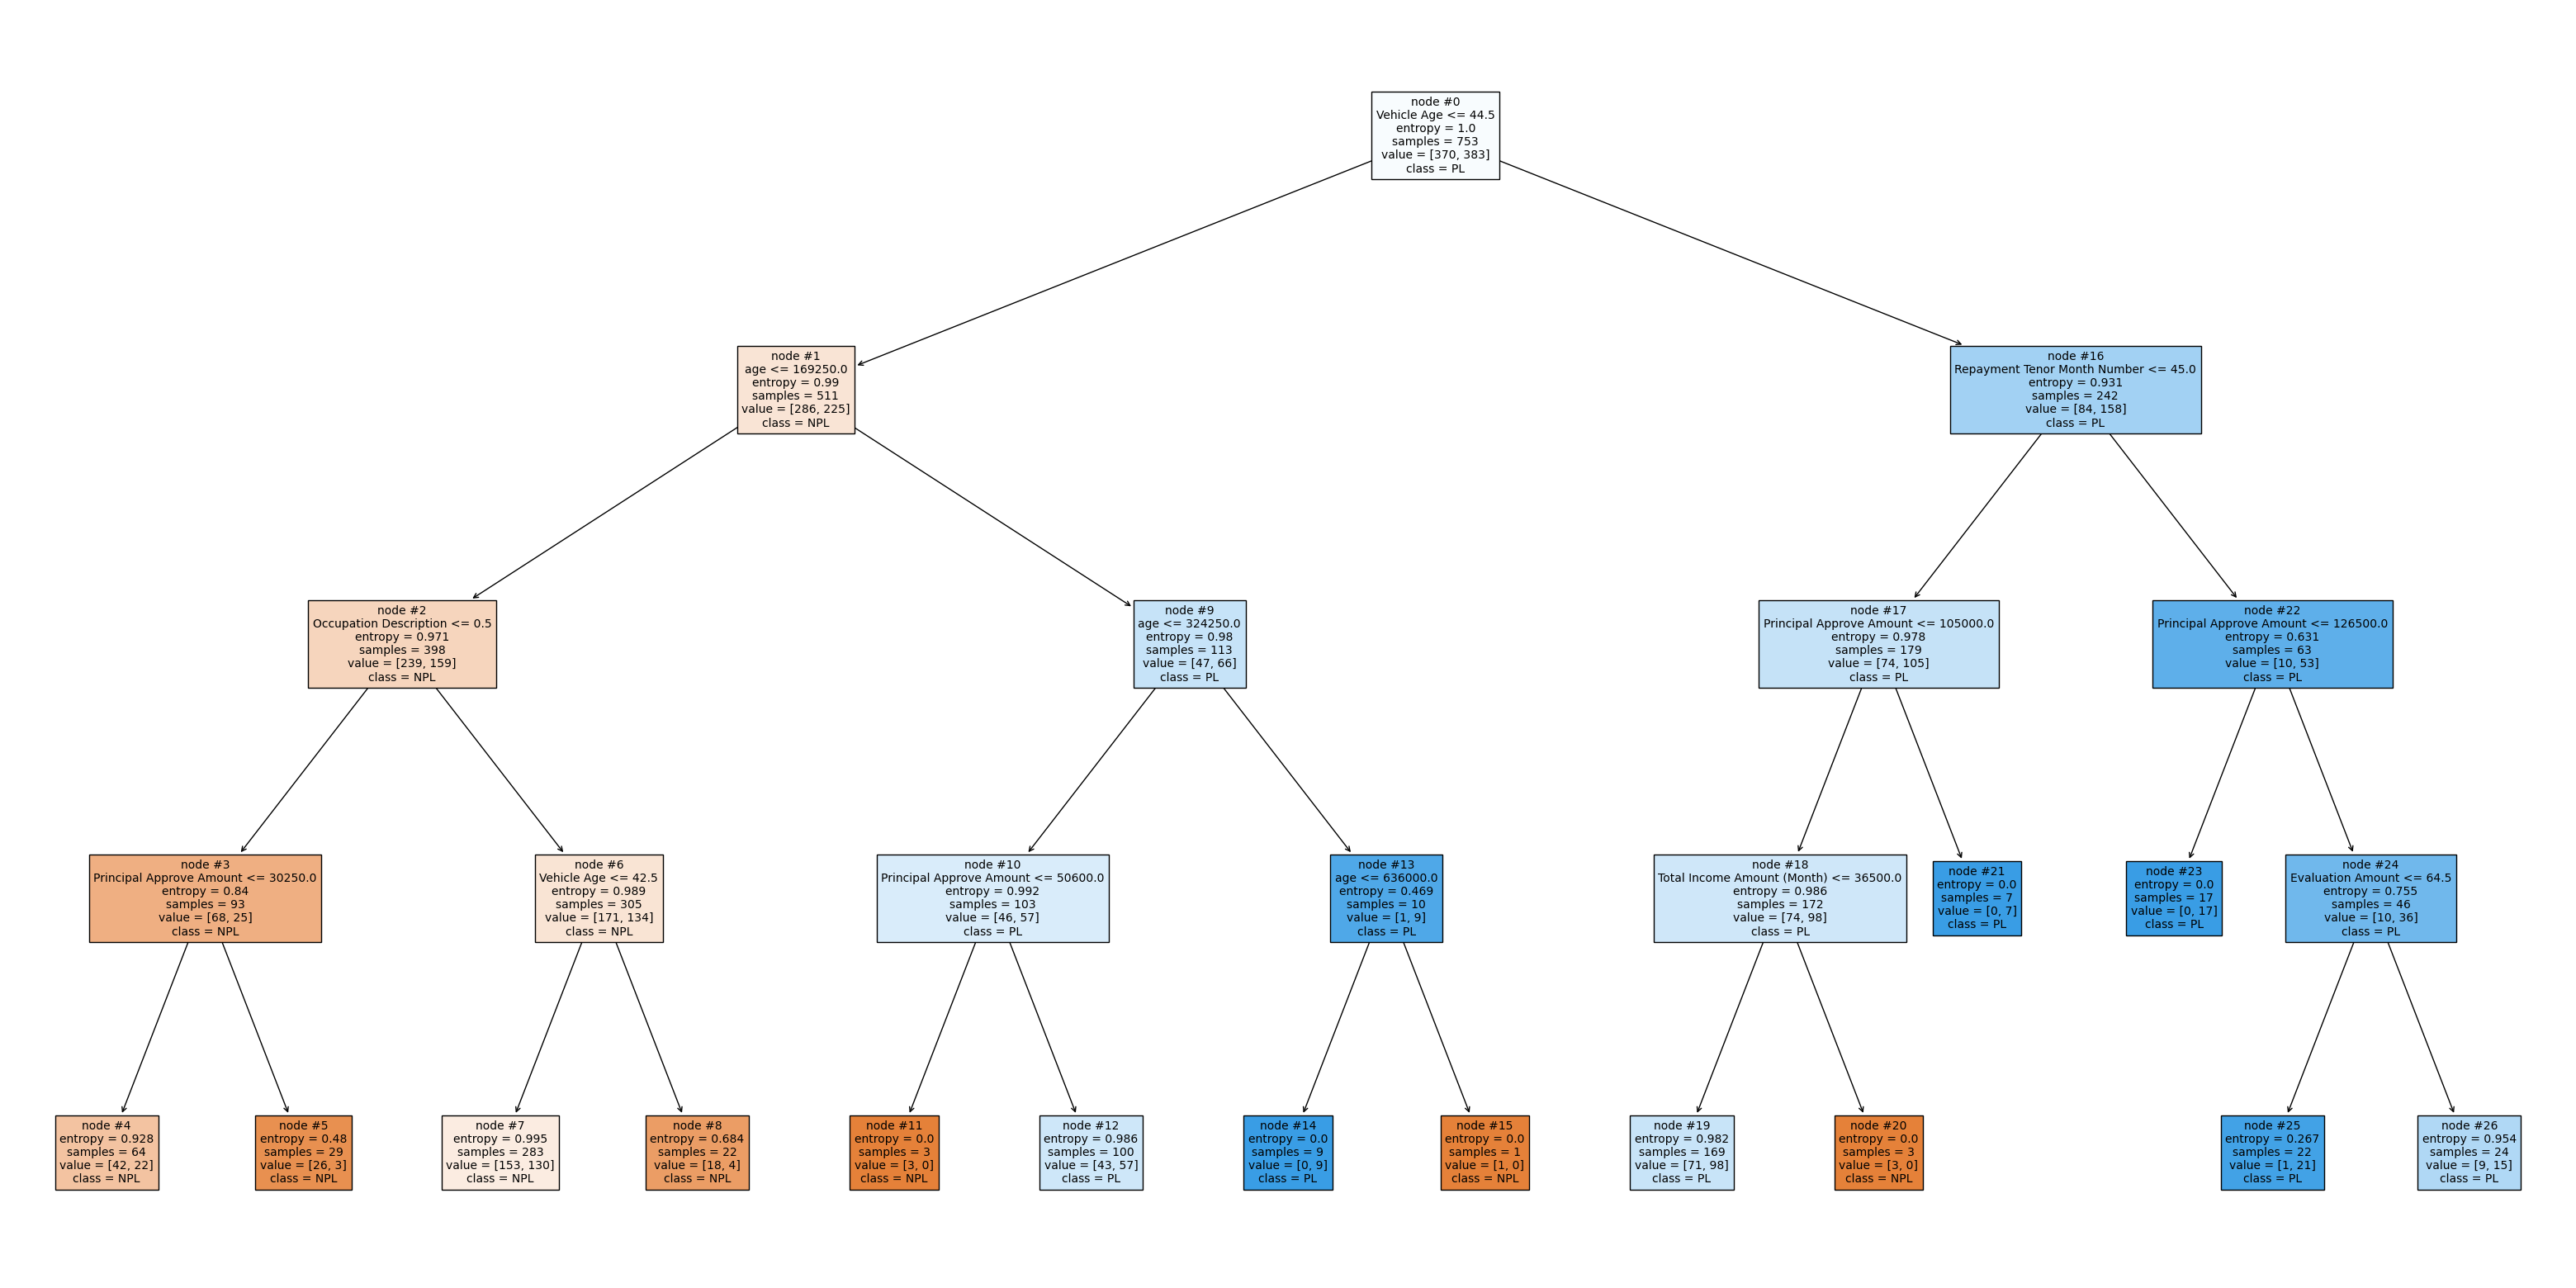

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Evaluation Amount', 'System CAR Code (Daily)', 'age', 'Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [ ]:
#pip install graphviz

In [ ]:
import graphviz

In [ ]:
# dot_data = tree.export_graphviz(classifier, out_file=None,
#                                 feature_names=['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Model', 'Vehicle Release Year', 'System CAR Code (Daily)',
#        'age', 'Vehicle Age'],  
#                                 class_names=['NPL','PL'],
#                                 filled=True,node_ids=True, rounded=True,
#                                 special_characters=True)
# graph = graphviz.Source(dot_data)
# graph

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Evaluation Amount', 'System CAR Code (Daily)', 'age', 'Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

ValueError: Length of feature_names, 11 does not match number of features, 12

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 27  17]
 [  0 340]]
Classification report  
               precision    recall  f1-score   support

         NPL       1.00      0.61      0.76        44
          PL       0.95      1.00      0.98       340

    accuracy                           0.96       384
   macro avg       0.98      0.81      0.87       384
weighted avg       0.96      0.96      0.95       384



In [ ]:
#pip install plot_confusion_matrix

In [ ]:
#pip install plot_roc_curve

In [ ]:
#pip install metrics

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


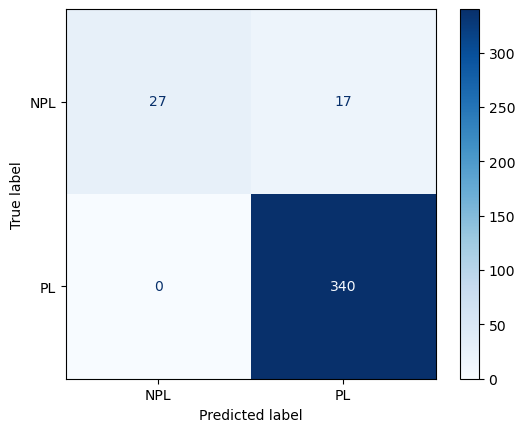

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


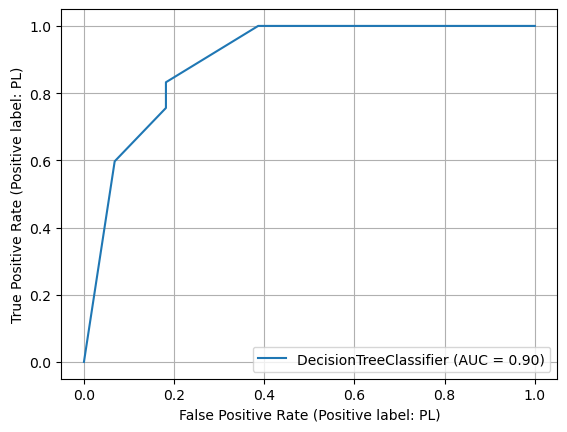

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()